In [2]:
import pandas as pd
import numpy as np
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")

In [3]:
lenders_tags = pd.read_pickle('lenders_with_tags_and_genders')

In [4]:
tag = list(lenders_tags['TAG_INTS'])

In [5]:
for i in range(len(tag) - 1):
    if type(tag[i]) is tuple:
        x = []
        for j in tag[i]:
            x.append(j.strip(' '))
        tag[i] = tuple(x)

In [6]:
lenders_tags['TAG_INTS'] = tag

In [7]:
gender_data = lenders_tags[['PGender','TAG_INTS']].explode('TAG_INTS')

In [8]:
gender_group = gender_data.groupby(['PGender', 'TAG_INTS'])['TAG_INTS'].count()

In [9]:
gender = pd.DataFrame(gender_group)
gender.index.names = ['gender', 'tag']
gender.reset_index(inplace = True)
gender = gender.sort_values(by=['gender', 'TAG_INTS'],ascending = False)
gender = gender[gender['tag'] != 'user_favorite']
gender_male = gender[gender['gender'] == 'M']
gender_female = gender[gender['gender'] == 'F']

In [10]:
from matplotlib import pyplot as plt
import matplotlib.lines as lines

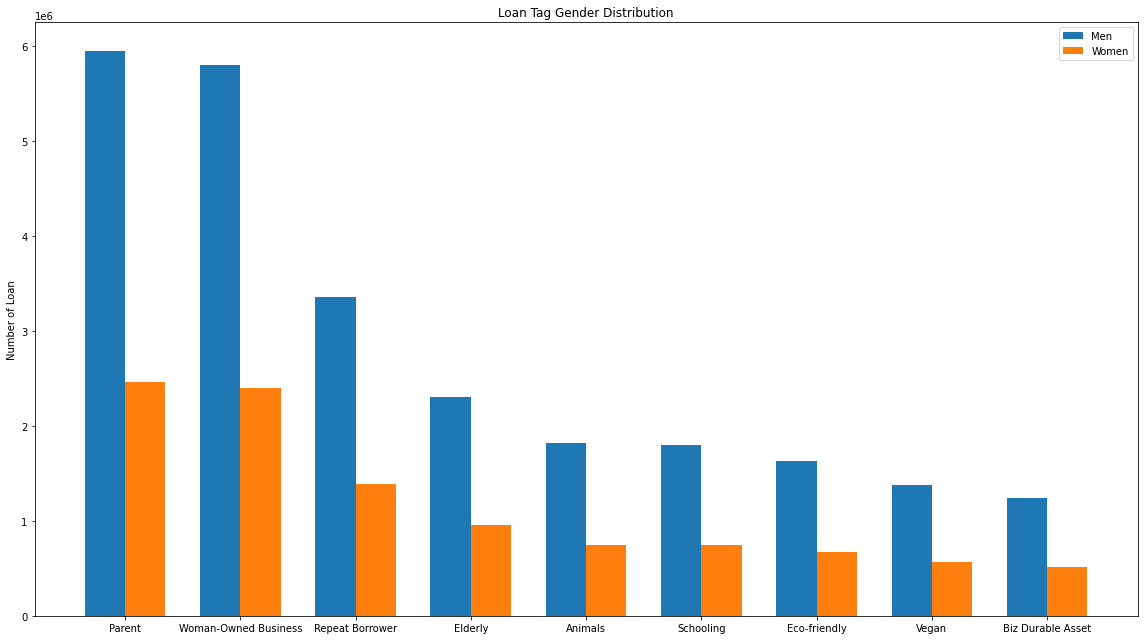

In [13]:
fig, ax = plt.subplots(figsize=(16,9))
x = np.arange(len(gender_male['tag'][0:9])) 
width = 0.35
rects1 = ax.bar(x - width/2, gender_male['TAG_INTS'][0:9], width, label='Men')
rects2 = ax.bar(x + width/2, gender_female['TAG_INTS'][0:9], width, label='Women')
ax.set_ylabel('Number of Loan')
ax.set_title('Loan Tag Gender Distribution')
ax.set_xticks(x)
ax.set_xticklabels(gender_male['tag'][0:9])
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.savefig('Loan Tag Gender Distribution')
plt.show()


In [31]:
lenders_tags['MEMBER_SINCE'] = pd.to_datetime(lenders_tags['MEMBER_SINCE'], unit='s')
lenders_tags['PURCHASE_PER_MONTH'] = lenders_tags['LOAN_PURCHASE_NUM']/((pd.to_datetime('2021-02-20 00:00:00') - lenders_tags['MEMBER_SINCE'])/np.timedelta64(1, 'M'))

In [32]:
loan_per_month = lenders_tags[['TAG_INTS', 'PURCHASE_PER_MONTH']].explode('TAG_INTS').groupby('TAG_INTS').mean()

In [33]:
loan_per_month.reset_index(inplace = True)
loan_per_month = loan_per_month.sort_values(by=['PURCHASE_PER_MONTH'],ascending = False)

In [34]:
#######find the tag distriubtion for incuumbent audience 

In [35]:
incumbent_audience = lenders_tags[(lenders_tags['PURCHASE_PER_MONTH'] > 0.5) & (lenders_tags['PURCHASE_PER_MONTH'] < 2)][['TAG_INTS','PURCHASE_PER_MONTH']]

In [36]:
incumbent_audience = incumbent_audience.explode('TAG_INTS').groupby('TAG_INTS').count()

In [37]:
incumbent_audience.reset_index(inplace = True)
incumbent_audience = incumbent_audience.sort_values(by=['PURCHASE_PER_MONTH'],ascending = False)
incumbent_audience = incumbent_audience[incumbent_audience['TAG_INTS'] != 'user_favorite']

In [60]:
incumbent_audience.merge(gender, how = 'left', on = 'TAG_INTS')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [70]:
######## find the tag distriubtion from super users

In [71]:
super_audience = lenders_tags[lenders_tags['PURCHASE_PER_MONTH'] > 2][['TAG_INTS','PURCHASE_PER_MONTH']]
super_audience = super_audience.explode('TAG_INTS').groupby('TAG_INTS').count()
super_audience.reset_index(inplace = True)
super_audience = super_audience.sort_values(by=['PURCHASE_PER_MONTH'],ascending = False)
super_audience = super_audience[super_audience['TAG_INTS'] != 'user_favorite']

In [75]:
#######

In [58]:
gender

,gender,tag,TAG_INTS
57,M,Parent,5948374
78,M,Woman-Owned Business,5793198
63,M,Repeat Borrower,3354635
45,M,Elderly,2307388
42,M,Animals,1813564
...,...,...,...
27,F,Team Guys Holding Fish,1083
17,F,Powerful Story,588
37,F,reserved_crisis_support_loan,136
39,F,user_like,5


In [51]:
p

poly1d([-600588.01666667, 5209313.17777777])